## Feynn Labs - Machine Learning Internship

### Task - Brain tumor detection using Machine Learning

Outline :
1. Importing Libraries
2. Data Analysis
3. Train-Test Split
4. Feature Scaling
5. Model Building & Evaluation
6. Validation on test data

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Analysis(Cleaning and Preparation)

In [3]:
import os

In [115]:
path = os.listdir('C:/Users/midhi/Downloads/data/Training')
# Labelling the classes
classes = {'no_tumor' : 0, 'tumor': 1}

In [116]:
import cv2
# Creating two lists, in X we will append all images and Y we will append the target variables
X = []
Y = []

for cls in classes:
    pth = 'C:/Users/midhi/Downloads/data/Training/' + cls
    
    for j in os.listdir(pth):
        # Reading the image
        img = cv2.imread(pth+'/'+j, 0)
        # All images must be of same size before passing it to our model
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])          

In [117]:
# Checking the two classes
np.unique(Y)

array([0, 1])

In [118]:
# Converting both of them into array form
X = np.array(X)
Y = np.array(Y)

In [119]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

827 patients have a brain tumor

In [120]:
X.shape

(1222, 200, 200)

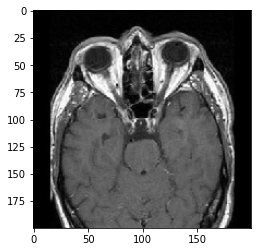

In [121]:
# Visualizing the first image
plt.imshow(X[0],cmap='gray')
plt.show()

In [122]:
# Reshaping the data and converting into 2D
X_new = X.reshape(len(X),-1)
X_new.shape

(1222, 40000)

### Train test split

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,Y,random_state=20,test_size=0.3)

In [124]:
print(x_train.shape)
print(x_test.shape)

(855, 40000)
(367, 40000)


### Feature Scaling

In [125]:
# For images the rgb range is between (0,255), hence doing this
x_train = x_train/255
x_test = x_test/255

print('\nAfter feature scaling:\n')
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())


After feature scaling:

1.0 0.0
1.0 0.0


### Model Building & Evaluation

Testing the fit of 4 models in order to identify the best:
1. Logistic Regression: Basic linear classifier(good to baseline)
2. Support Vector Machine: Maximum margin classifier
3. K Nearest Neighbors: Instance based classifier
4. Random Forest Classifier: Ensemble bagging classifier

In [126]:
# Importing model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [127]:
# Fitting the LogisticRegression model to the training set
logistic = LogisticRegression(C=0.1)
logistic.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [128]:
# Fitting the SVC model to the training set
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [129]:
# Fitting the KNN model to the training set
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [130]:
# Fitting the RandomForestClassifier to the training set
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [131]:
# Various model scores on training and testing data
print('Logistic Regression:')
print('Training Score :',logR.score(x_train,y_train))
print('Testing Score :',logR.score(x_test,y_test))
print('\n')

print('Support Vector Machine:')
print('Training Score :',sv.score(x_train,y_train))
print('Testing Score :',sv.score(x_test,y_test))
print('\n')

print('K Nearest Neighbors:')
print('Training Score :',knn.score(x_train,y_train))
print('Testing Score :',knn.score(x_test,y_test))
print('\n')

print('Random Forest Classifier:')
print('Training Score :',rfc.score(x_train,y_train))
print('Testing Score :',rfc.score(x_test,y_test))
print('\n')

Logistic Regression:
Training Score : 1.0
Testing Score : 0.9591280653950953


Support Vector Machine:
Training Score : 0.9894736842105263
Testing Score : 0.9591280653950953


K Nearest Neighbors:
Training Score : 0.9508771929824561
Testing Score : 0.9209809264305178


Random Forest Classifier:
Training Score : 1.0
Testing Score : 0.9782016348773842




Random Forest Classifier is the model which has a great score on both the training as well as the testing data

In [132]:
# Predicting the test set result
y_pred = logR.predict(x_test)
y_pred1 =sv.predict(x_test)
y_pred2 = knn.predict(x_test)
y_pred3 = rfc.predict(x_test)

In [133]:
# Performance Evaluation of various models
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix
print('Logistic Regression:\n')
print('Accuracy : %.3f' %accuracy_score(y_test,y_pred))
print('Precision : %.3f' %precision_score(y_test,y_pred))
print('Recall : %.3f' %recall_score(y_test,y_pred))
print('F1 score : %.3f' %f1_score(y_test,y_pred))

print('\nSupport Vector Machine:\n')
print('Accuracy : %.3f' %accuracy_score(y_test,y_pred1))
print('Precision : %.3f' %precision_score(y_test,y_pred1))
print('Recall : %.3f' %recall_score(y_test,y_pred1))
print('F1 score : %.3f' %f1_score(y_test,y_pred1))

print('\nK Nearest Neighbor:\n')
print('Accuracy : %.3f' %accuracy_score(y_test,y_pred2))
print('Precision : %.3f' %precision_score(y_test,y_pred2))
print('Recall : %.3f' %recall_score(y_test,y_pred2))
print('F1 score : %.3f' %f1_score(y_test,y_pred2))

print('\nRandom Forest Classifier:\n')
print('Accuracy : %.3f' %accuracy_score(y_test,y_pred3))
print('Precision : %.3f' %precision_score(y_test,y_pred3))
print('Recall : %.3f' %recall_score(y_test,y_pred3))
print('F1 score : %.3f' %f1_score(y_test,y_pred3))

Logistic Regression:

Accuracy : 0.959
Precision : 0.951
Recall : 0.992
F1 score : 0.971

Support Vector Machine:

Accuracy : 0.959
Precision : 0.947
Recall : 0.996
F1 score : 0.971

K Nearest Neighbor:

Accuracy : 0.921
Precision : 0.903
Recall : 0.992
F1 score : 0.945

Random Forest Classifier:

Accuracy : 0.978
Precision : 0.977
Recall : 0.992
F1 score : 0.984


Results:
1. Accuracy: Random Forest produced the best test accuracy of 97.8
2. Precision: Random Forest is a clear winner having a precision of 97.7 followed by Logistic Regression & Suport Vector Machine in second and third places, respectively.
3. Recall: Support Vector Machine is the strongest by far with a score of 99.6. The other three have an identical score of 99.2
4. F1score: Random Forest is the best having a score of 98.4, followed by Support Vector Machine & Logistic Regression having identical scores of 97.1

Hence we'll be selecting our final model as Random Forest Classifier, and use it for prediction.

In [134]:
#Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred3)
print(cm)

[[108   6]
 [  2 251]]


As we can see from the confusion matrix, 8 instances have been misclassified.

In [135]:
# Misclassified Instances
y_pred3 = rfc.predict(x_test)
np.where(y_test!=y_pred3)

(array([ 59,  78,  97, 238, 256, 269, 306, 357], dtype=int64),)

These were the 8 misclassified instances by our model.

In [106]:
# Checking
print('Actual value :',y_test[59])
print('Predicted value:',y_pred3[59])


Actual value : 0
Predicted value: 1


### Validating the same on our test data

In [136]:
test = {0 : 'No tumor', 1 : 'Tumor'}

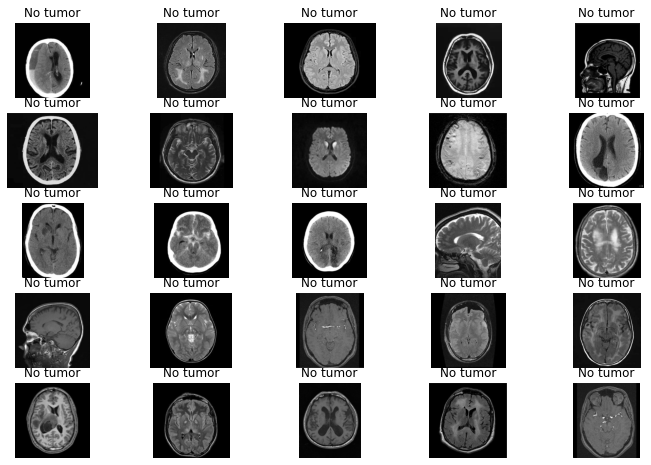

In [138]:
# Test data having images of no tumor
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/midhi/Downloads/data/Testing/')
c=1
for i in os.listdir('C:/Users/midhi/Downloads/data/Testing/no_tumor/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('C:/Users/midhi/Downloads/data/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = rfc.predict(img1)
    plt.title(test[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

Our model gives an accuracy of 100% by predicting all the images correctly

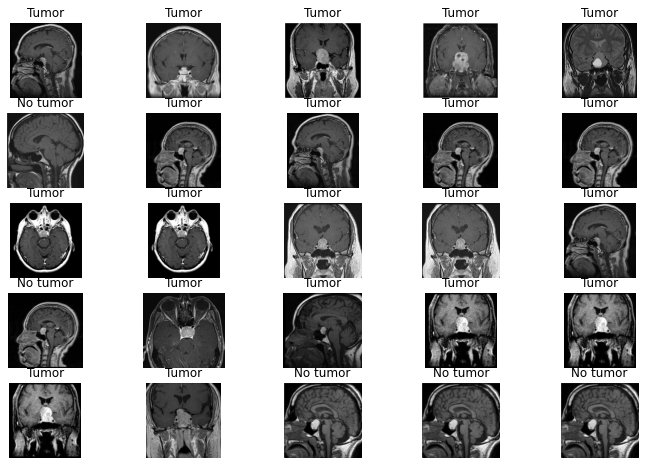

In [137]:
# Test data of images having tumor
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/midhi/Downloads/data/Testing/')
c=1
for i in os.listdir('C:/Users/midhi/Downloads/data/Testing/tumor/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('C:/Users/midhi/Downloads/data/Testing/tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = rfc.predict(img1)
    plt.title(test[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

As we can see five instances have been misclassified, the similar procedure can be applied to check for all the images and hence the accuracy can be determined.